In [1]:
import pandas as pd

taxi_train = pd.read_csv('train.csv')
taxi_train.columns.to_list()

taxi_test = pd.read_csv('test.csv')
taxi_test.columns.to_list()

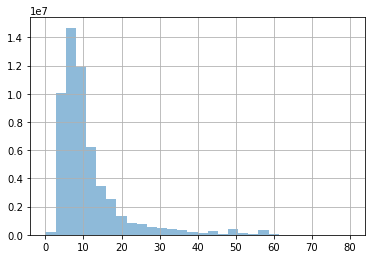

In [ ]:
import matplotlib.pyplot as plt

taxi_train.fare_amount.hist(bins=30, alpha=0.5, range=(0,80))
plt.show()

In [ ]:
# check missing values in taxi_train
taxi_train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
# impute missing values in dropoff_longitude and dropoff_latitude with mean
taxi_train.dropoff_longitude.fillna(taxi_train.dropoff_longitude.mean(), inplace=True)
taxi_train.dropoff_latitude.fillna(taxi_train.dropoff_latitude.mean(), inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X=taxi_train[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']],
       y=taxi_train['fare_amount'])

LinearRegression()

In [ ]:
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
taxi_test['fare_amount'] = lr.predict(taxi_test[features])

In [ ]:
taxi_sample_sub = pd.read_csv('sample_submission.csv')
taxi_sample_sub.head(1)

taxi_submission = taxi_test[['key', 'fare_amount']]
taxi_submission.to_csv('submission.csv', index=False)